# Test of 2D Visualization Tools

Imports.

In [6]:
%matplotlib widget

import kiruna.core as core
import kiruna.sampler as sampler
import kiruna.scene as scene
import kiruna.visualization.scene_visualization as scene_visualization
import matplotlib.pyplot as plt
import numpy
import torch
import utils

dropdown_widget = utils.get_experiment_info(save_results=False)

RadioButtons(description='Device:', index=4, options=('atlas_1.2', 'palau', 'sydney', 'tasman', 'p47', 'p47_PO…

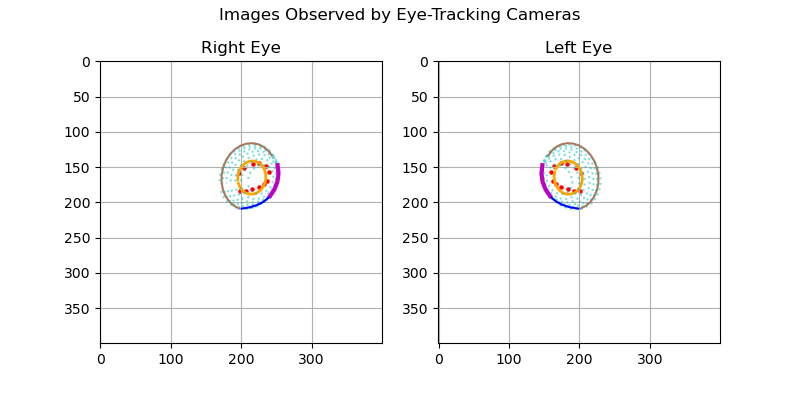

In [7]:
# Create a scene.
scene_file_name, _ = \
    utils.get_configuration_files(dropdown_widget.value)  # type: ignore
et_scene = scene.SceneModel(parameter_file_name=scene_file_name)

subsystem_index = 0
camera_index = 0

subsystem = et_scene.device.subsystems[subsystem_index]
camera = subsystem.cameras[camera_index]
resolution = camera.resolution.clone().detach().numpy()

#angles_deg = torch.tensor((20.0, 15.0))
#angles_deg = torch.tensor((-20.0, -15.0))
angles_deg = torch.tensor((0.0, 0.0))

figsize = numpy.array([2, 1]) * resolution
height_in = 8
figsize = [height_in, height_in * figsize[1] / figsize[0]]

titles = ("Left Eye", "Right Eye")
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=figsize)
plt.suptitle("Images Observed by Eye-Tracking Cameras")

for i in range(2):
    eye = et_scene.user.eyes[i]
    eye.rotate_from_gaze_angles_inParent(angles_deg)

    ax = axs[1 - i]
    ax.set_title(titles[i])
    ax.grid()
    et_image_visualization = \
        scene_visualization.ImageVisualization(
            et_scene, ax, subsystem_index=i  # type: ignore
        )

    et_image_visualization.visualize_refracted_pupil()
    et_image_visualization.visualize_cornea()
    et_image_visualization.visualize_glints()
    et_image_visualization.visualize_limbus()
    et_image_visualization.visualize_eyelids()

    eye.unrotate_from_gaze_angles_inParent(angles_deg)